#Self

Name - Soumya Bairagya

College - VIT, Pune

E-mail - bairagyasoumya2001@gmail.com

Ph no - 9860135277

#Titanic Assignment

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.Sex = df_train.Sex.replace(("male","female"),(1,0))
df_test.Sex = df_test.Sex.replace(("male","female"),(1,0))

*.............Assigning 0 to female and 1 to male*

In [ ]:
imp = df_train.groupby("Survived").mean()
imp

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,,
0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


So, from above, we find that the important features are **Pclass, Sex, Age, SibSp, Parch, Fare**

In [ ]:
df_train = df_train.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)
df_test = df_test.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)

Finding number of empty entries

In [ ]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
df_test.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [ ]:
m = df_train['Age'].mean()
n = df_test['Age'].mean()
df_train['Age'] = df_train['Age'].fillna(m)
df_test['Age'] = df_test['Age'].fillna(n)
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mode()[0])

In [ ]:
df_train.info()
print('-'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


Finally, no null entries remain.

In [ ]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


This indicates 38.38% of Survival Rate of passengers.

In [ ]:
pclass_survived = df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()
pclass_survived

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
sex_survived = df_train[['Sex', 'Survived']].groupby(['Sex']).mean()
sex_survived

,Survived
Sex,
0,0.742038
1,0.188908


This shows that Females have higher survival rate i.e 74.20%

In [ ]:
df_train['AgeRange'] = pd.cut(df_train['Age'],5)
age_range_survived = df_train[['AgeRange', 'Survived']].groupby(['AgeRange'],as_index=False).mean()
age_range_survived

,AgeRange,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


Survival according to the age groups is done above

Infants (Age <=4) had high survival rate.
Max survival rate is seen in the Age range (0.34, 16.336]	.
Oldest passengers (Age = 80) survived.

In [ ]:
sibsp_survived = df_train[['SibSp', 'Survived']].groupby(['SibSp']).mean()
sibsp_survived

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
parch_survived = df_train[['Parch', 'Survived']].groupby(['Parch']).mean()
parch_survived

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


##Visualization

          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.543351 -0.069809 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000  0.131900 -0.331339  0.083081  0.018443 -0.549500
Sex      -0.543351  0.131900  1.000000  0.084153 -0.114631 -0.245489 -0.182333
Age      -0.069809 -0.331339  0.084153  1.000000 -0.232625 -0.179191  0.091566
SibSp    -0.035322  0.083081 -0.114631 -0.232625  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.245489 -0.179191  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500 -0.182333  0.091566  0.159651  0.216225  1.000000


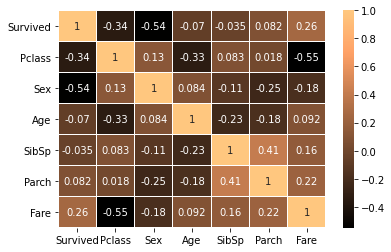

In [ ]:
print(df_train.corr())
sns.heatmap(df_train.corr(),cmap="copper",annot=True,linewidths=0.2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f111e261f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f111e12f2e8>)

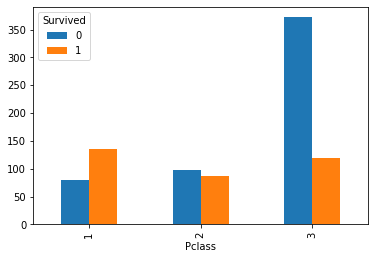

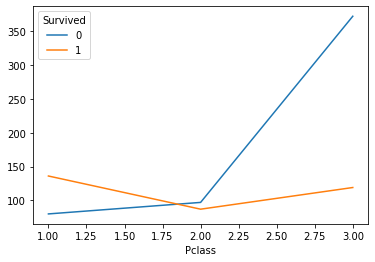

In [ ]:
pd.crosstab(df_train.Pclass,df_train.Survived).plot(kind='bar'),pd.crosstab(df_train.Pclass,df_train.Survived).plot(kind='line')

Hence, Maximum Survival is seen in the !st Class Passenger group.
There are many passengers in 3rd class but max did not survive.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


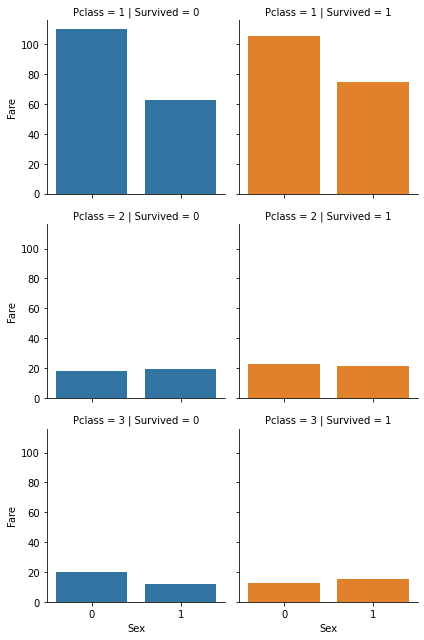

In [ ]:
ptf = sns.FacetGrid(df_train,row="Pclass",col="Survived",hue="Survived")
ptf.map(sns.barplot,"Sex","Fare",ci=None)

Here, passengers paying higher fare survived the most.

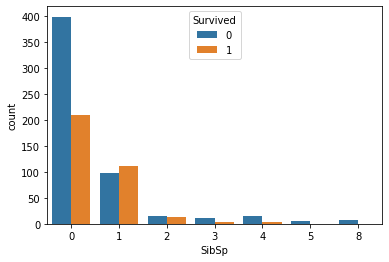

In [ ]:
sns.countplot("SibSp",hue="Survived",data=df_train)

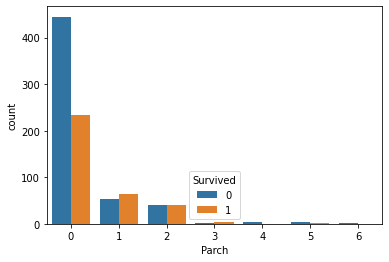

In [ ]:
sns.countplot("Parch",hue="Survived",data=df_train)

Hence from above, Passengers who were alone had maximum survival rate.

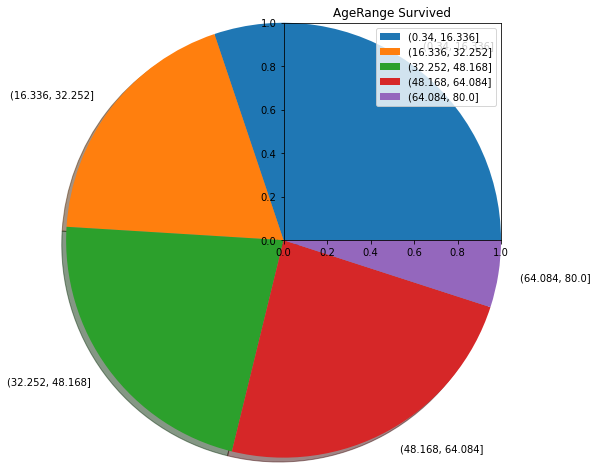

In [ ]:
plt.pie("Survived",data=age_range_survived,labels="AgeRange",shadow=True,frame=True)
plt.title("AgeRange Survived")
plt.legend()

Survival according to different age groups is shown above.

Infants (Age <=4) had high survival rate.
Max survival rate is seen in the Age range (0.34, 16.336]	.
Oldest passengers (Age = 80) survived.

##Models

According to the data, Classification is the most important here.
So the models implemented are - 

1. Logistic Regression
2. Support Vector Machines
3. Naive Bayes Classifier
4. Decission Tree Classifier
5. Random Forest Classifier

In [ ]:
X = df_train.drop(['Survived','AgeRange'],axis=1)
Y = df_train.Survived
X_test = df_test
from sklearn.model_selection import train_test_split
X_train,X_check,y_train,y_check = train_test_split(X,Y,test_size=0.3)

In [ ]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_check:',X_check.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (623, 6)
Shape of X_check: (268, 6)
Shape of X_test: (418, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

####Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_check,y_check)

0.8097014925373134

####Support Vector Machines

In [ ]:
Sv1 = SVC(C=50,kernel="linear",gamma="scale")
Sv1.fit(X_train,y_train)
Sv1.score(X_check,y_check)

0.7798507462686567

In [ ]:
Sv2 = SVC(C=50,kernel="rbf",gamma="scale")
Sv2.fit(X_train,y_train)
Sv2.score(X_check,y_check)

0.7873134328358209

####Naive Bayes classifier

In [ ]:
NB = GaussianNB()
NB.fit(X_train,y_train)
NB.score(X_check,y_check)

0.8022388059701493

In [ ]:
BB = BernoulliNB()
BB.fit(X_train,y_train)
BB.score(X_check,y_check)

0.7798507462686567

In [ ]:
MB = MultinomialNB()
MB.fit(X_train,y_train)
MB.score(X_check,y_check)

0.6977611940298507

Decision Tree Classifier

In [ ]:
DTC = DecisionTreeClassifier(criterion='gini')
DTC.fit(X_train,y_train)
DTC.score(X_check,y_check)

0.7761194029850746

####Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC.score(X_check,y_check)

0.8134328358208955

####Prediction

According to the highest accuracy achieved, model is selected and Predictions using that model is done.

In [ ]:
models = pd.DataFrame({
    'Model': ['SVM - linear', 'SVM - rbf', 'Logistic Regression', 
              'Random Forest Classifier', 'Naive Bayes - Gaussian', 'Naive Bayes - Bernoulli', 'Naive Bayes - Multinomial', 'Decision Tree Classifier'],
    'Score': [Sv1.score(X_check,y_check),Sv2.score(X_check,y_check),LR.score(X_check,y_check),
              RFC.score(X_check,y_check),NB.score(X_check,y_check),BB.score(X_check,y_check),
              MB.score(X_check,y_check),DTC.score(X_check,y_check)]})
models.sort_values(by="Score")

,Model,Score
6,Naive Bayes - Multinomial,0.697761
7,Decision Tree Classifier,0.776119
0,SVM - linear,0.779851
5,Naive Bayes - Bernoulli,0.779851
1,SVM - rbf,0.787313
4,Naive Bayes - Gaussian,0.802239
2,Logistic Regression,0.809701
3,Random Forest Classifier,0.813433


In [ ]:
y_test = RFC.predict(X_test)
y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Above are the predictions.

##Conclusion

Hence,

        1. Hence, Maximum Survival is seen in the 1st Class Passenger group. There are many passengers in 3rd class but max did not survive.
        2. High Fare paying passengers were most survived.
        3. Number of females who survived are more than the males (This shows that Females have higher survival rate i.e 74.20%)
        4. Infants (Age <=4) had high survival rate. Max survival rate is seen in the Age range (0.34, 16.336]. Oldest passengers (Age = 80) survived.
        5. Passengers who were alone had maximum survival rate.
        6. Accuracies of different models are acquired. The highest score is selected and the prediction on test data is done.